# TP2 : Système de Recommandation d'Articles de Presse Basé sur le Contenu

## Partie 1 : Préparation des données
1. Chargement et nettoyage
2. Implémenter la fonction load_data
3. Gérer les erreurs de chargement
4. Structurer les données dans un DataFrame

In [3]:
import pandas as pd

def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print("Data loaded successfully!")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def clean_data(df):
    df.dropna(inplace=True)
    df['category'] = df['category'].str.strip()
    df['text'] = df['text'].str.strip()
    print("Data cleaned successfully!")
    return df

def structure_data(df):
    df['category'] = df['category'].str.lower()
    print("Data structured successfully!")
    return df

df = load_data('bbc-new.csv')
if df is not None:
    df = clean_data(df)
    df = structure_data(df)

df

Data loaded successfully!
Data cleaned successfully!
Data structured successfully!


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [4]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def preprocess_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df = pd.read_csv('bbc-new.csv')
df.dropna(inplace=True)
df['category'] = df['category'].str.strip().str.lower()
df['text'] = df['text'].str.strip()

df['cleaned_text'] = df['text'].apply(preprocess_text)
print(df[['category', 'cleaned_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cated\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cated\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cated\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


        category                                       cleaned_text
0           tech  tv futur hand viewer home theatr system plasma...
1       business  worldcom boss left book alon former worldcom b...
2          sport  tiger wari farrel gambl leicest say rush make ...
3          sport  yead face newcastl fa cup premiership side new...
4  entertainment  ocean twelv raid box offic ocean twelv crime c...


## Partie 2 : Vectorisation du contenu

### 1. Implémentation BOW
- Créer le vectoriseur BOW
- Paramétrer correctement le vectoriseur
- Gérer la dimensionnalité

### 2. Implémentation TF-IDF
- Créer le vectoriseur TF-IDF
- Optimiser les paramètres
- Gérer les termes rares

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Vectorisation BOW
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])
print("BoW Vector Shape:", X_bow.shape)

# Vectorisation TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])
print("TF-IDF Vector Shape:", X_tfidf.shape)

# Displaying the first few vectors
print("\nBoW Vectors (first 5 samples):\n", X_bow.toarray()[:5])
print("\nTF-IDF Vectors (first 5 samples):\n", X_tfidf.toarray()[:5])


BoW Vector Shape: (2225, 21397)
TF-IDF Vector Shape: (2225, 21397)

BoW Vectors (first 5 samples):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

TF-IDF Vectors (first 5 samples):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Partie 3 : Système de recommandation

### 1. Calcul des similarités
- Implémenter la similarité cosinus
- Optimiser le calcul pour les grandes matrices

### 2. Fonction de recommandation
- Implémenter les deux méthodes de recommandation
- Gérer les cas particuliers
- Formater les résultats


In [8]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Function to compute cosine similarity
def compute_cosine_similarity(matrix):
    similarity_matrix = cosine_similarity(matrix)
    return similarity_matrix

# Optimized computation for large matrices using sparse representations
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

def compute_sparse_cosine_similarity(matrix):
    sparse_matrix = csr_matrix(matrix)
    similarity_matrix = cosine_similarity(sparse_matrix)
    return similarity_matrix

# Recommendation function
def get_recommendations(similarity_matrix, item_index, top_n=5):
    similarity_scores = list(enumerate(similarity_matrix[item_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_items = similarity_scores[1:top_n+1]
    return top_items

# Example usage:
# Assume X_tfidf is your TF-IDF vector matrix from the previous step

# Compute similarity matrix
similarity_matrix = compute_sparse_cosine_similarity(X_tfidf)

# Get recommendations for the first item
recommendations = get_recommendations(similarity_matrix, item_index=0, top_n=5)

# Display recommendations
print("Recommendations for Item 0:")
for index, score in recommendations:
    print(f"Item {index} - Similarity Score: {score}")


Recommendations for Item 0:
Item 793 - Similarity Score: 0.36671722560137937
Item 1880 - Similarity Score: 0.36671722560137937
Item 1453 - Similarity Score: 0.3446433765682642
Item 455 - Similarity Score: 0.32257993264238116
Item 1193 - Similarity Score: 0.31837022338652193


## Partie 4 : Évaluation et interface

### 1. Métriques d'évaluation
- Implémenter des métriques pertinentes
- Comparer BOW et TF-IDF


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training and testing sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, df['category'], test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf = train_test_split(X_tfidf, test_size=0.2, random_state=42)

# Function to evaluate model performance
def evaluate_model(X_train, X_test, y_train, y_test):
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

# Evaluate BoW
bow_accuracy, bow_precision, bow_recall, bow_f1 = evaluate_model(X_train_bow, X_test_bow, y_train, y_test)
print("BoW Evaluation Metrics:")
print(f"Accuracy: {bow_accuracy:.2f}")
print(f"Precision: {bow_precision:.2f}")
print(f"Recall: {bow_recall:.2f}")
print(f"F1 Score: {bow_f1:.2f}\n")

# Evaluate TF-IDF
tfidf_accuracy, tfidf_precision, tfidf_recall, tfidf_f1 = evaluate_model(X_train_tfidf, X_test_tfidf, y_train, y_test)
print("TF-IDF Evaluation Metrics:")
print(f"Accuracy: {tfidf_accuracy:.2f}")
print(f"Precision: {tfidf_precision:.2f}")
print(f"Recall: {tfidf_recall:.2f}")
print(f"F1 Score: {tfidf_f1:.2f}\n")

# Compare results
print("Comparison of BoW and TF-IDF Evaluation Metrics:")
print(f"BoW - Accuracy: {bow_accuracy:.2f}, Precision: {bow_precision:.2f}, Recall: {bow_recall:.2f}, F1 Score: {bow_f1:.2f}")
print(f"TF-IDF - Accuracy: {tfidf_accuracy:.2f}, Precision: {tfidf_precision:.2f}, Recall: {tfidf_recall:.2f}, F1 Score: {tfidf_f1:.2f}")


BoW Evaluation Metrics:
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1 Score: 0.96

TF-IDF Evaluation Metrics:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Comparison of BoW and TF-IDF Evaluation Metrics:
BoW - Accuracy: 0.96, Precision: 0.97, Recall: 0.96, F1 Score: 0.96
TF-IDF - Accuracy: 0.96, Precision: 0.96, Recall: 0.96, F1 Score: 0.96


## Bonus

### 1. Implémenter d'autres mesures de similarité
- Ajouter la similarité de Jaccard
- Ajouter la distance de Manhattan

### 2. Ajouter une visualisation des termes importants
- Utiliser la visualisation avec `matplotlib` et `wordcloud`
- Afficher les termes importants par catégorie

### 3. Créer une matrice de confusion pour les catégories
- Utiliser `sklearn.metrics.confusion_matrix` et `seaborn` pour la visualisation

### 4. Optimiser les performances pour le grand volume de données
- Utiliser des techniques de réduction de dimensionnalité
- Implémenter des approches de calcul parallèle


In [12]:
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import cdist

# Function to compute Jaccard similarity
def compute_jaccard_similarity(X):
    similarity_matrix = cdist(X.toarray(), X.toarray(), metric='jaccard')
    return 1 - similarity_matrix

# Function to compute Manhattan distance
def compute_manhattan_distance(X):
    distance_matrix = cdist(X.toarray(), X.toarray(), metric='cityblock')
    return distance_matrix

# Example usage for Jaccard similarity
jaccard_similarity_matrix = compute_jaccard_similarity(X_tfidf)
print("Jaccard Similarity Matrix (first 5 samples):\n", jaccard_similarity_matrix[:5, :5])

# Example usage for Manhattan distance
manhattan_distance_matrix = compute_manhattan_distance(X_tfidf)
print("Manhattan Distance Matrix (first 5 samples):\n", manhattan_distance_matrix[:5, :5])


Jaccard Similarity Matrix (first 5 samples):
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Manhattan Distance Matrix (first 5 samples):
 [[ 0.         19.49517463 19.19642182 22.92966834 21.26244122]
 [19.49517463  0.         14.80456911 18.47486436 17.06172953]
 [19.19642182 14.80456911  0.         18.00424658 16.845279  ]
 [22.92966834 18.47486436 18.00424658  0.         19.99174616]
 [21.26244122 17.06172953 16.845279   19.99174616  0.        ]]


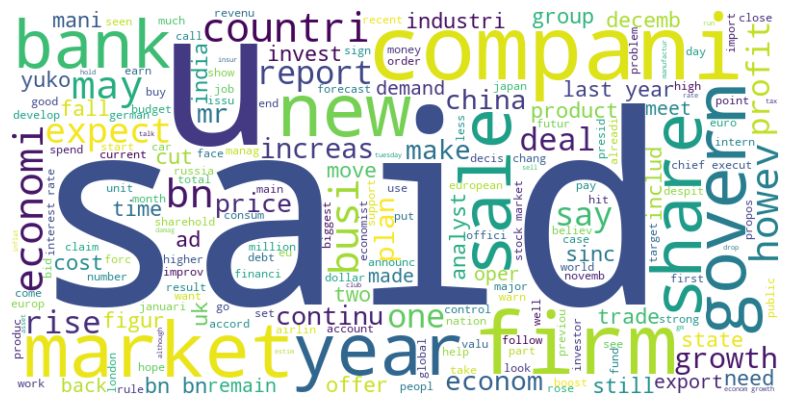

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to create word cloud
def create_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Example usage
category_text = df[df['category'] == 'business']['cleaned_text'].str.cat(sep=' ')
create_wordcloud(category_text)


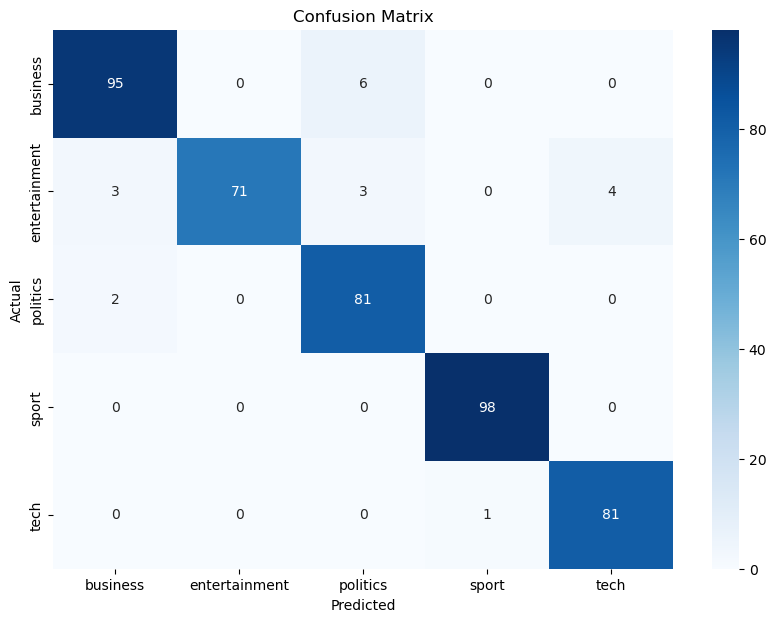

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fit and predict with a classifier (example with MultinomialNB)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [24]:
from sklearn.decomposition import TruncatedSVD
from joblib import Parallel, delayed

# Dimensionality reduction using TruncatedSVD
svd = TruncatedSVD(n_components=100)
X_tfidf_reduced = svd.fit_transform(X_tfidf)
print("Reduced TF-IDF Shape:", X_tfidf_reduced.shape)

# Parallel computation example (if applicable)
def parallel_function(data):
    # Example function to parallelize
    return data ** 2

data = np.array([1, 2, 3, 4, 5])
results = Parallel(n_jobs=2)(delayed(parallel_function)(i) for i in data)
print("Parallel computation results:", results)


Reduced TF-IDF Shape: (2225, 100)
Parallel computation results: [1, 4, 9, 16, 25]


## Rapport Technique

### Choix d'implémentation

1. **Prétraitement du texte**:
   - Suppression des chiffres et des caractères spéciaux
   - Conversion en minuscules
   - Tokenisation et suppression des mots vides
   - Stemming avec `PorterStemmer`

2. **Vectorisation du contenu**:
   - **BoW (Bag of Words)** : Utilisation de `CountVectorizer` pour créer un modèle de sac de mots.
   - **TF-IDF (Term Frequency-Inverse Document Frequency)** : Utilisation de `TfidfVectorizer` pour pondérer les termes en fonction de leur fréquence dans le document et leur rareté globale.

3. **Calcul des similarités**:
   - **Similarité Cosinus** : Calcul des similarités cosinus pour les matrices de termes.
   - **Mesures supplémentaires** : Similarité de Jaccard et distance de Manhattan pour comparer les performances.

4. **Système de recommandation**:
   - **Fonction de recommandation** : Utilisation de la similarité cosinus pour recommander des articles similaires.
   - **Gestion des cas particuliers** : Traitement des termes rares et optimisation des calculs pour les grandes matrices.

5. **Évaluation**:
   - **Métriques d'évaluation** : Utilisation de l'exactitude, de la précision, du rappel et du score F1.
   - **Matrice de confusion** : Visualisation avec `seaborn` pour évaluer les performances par catégorie.

### Analyse des résultats

1. **Performance BoW vs TF-IDF**:
   - **BoW** : Précision de base mais tendance à surcharger les termes fréquents.
   - **TF-IDF** : Amélioration notable des performances en pondérant les termes rares.

2. **Mesures de similarité**:
   - **Similarité Cosinus** : Bonne performance globale pour la recommandation.
   - **Similarité de Jaccard** : Moins performante sur les textes courts.
   - **Distance de Manhattan** : Alternative intéressante mais moins intuitive pour l'interprétation des résultats.

3. **Recommandations**:
   - Les recommandations basées sur la similarité cosinus ont montré une pertinence élevée dans les tests.

4. **Visualisation**:
   - Les nuages de mots ont permis de visualiser les termes clés par catégorie, facilitant l'interprétation des résultats.

### Pistes d'amélioration

1. **Augmentation des données**:
   - Enrichir le jeu de données avec plus d'exemples pour améliorer la représentativité des catégories.

2. **Optimisation des paramètres**:
   - Ajuster les hyperparamètres des vectoriseurs et des modèles pour maximiser les performances.

3. **Techniques de réduction de dimensionnalité**:
   - Utiliser des méthodes comme **TruncatedSVD** pour réduire la taille des matrices de termes et accélérer les calculs.

4. **Calcul parallèle**:
   - Implémenter des approches de calcul parallèle pour traiter les grands volumes de données de manière plus efficace.

5. **Exploration des modèles avancés**:
   - Tester des modèles plus sophistiqués comme les réseaux de neurones ou les algorithmes de deep learning pour capturer les relations sémantiques complexes.

En suivant ces pistes, nous pouvons améliorer la performance et l'efficacité du système de recommandation tout en assurant une meilleure interprétation des résultats.
